# Machine Learning in Finance - Regressions

# 1. Introduction

We will be using ETF data in order to construct Linear Regressions, PCA Regressions and LASSO Regressions.

# 2	Data Importing
## 2.1	Import the data from the csv file

In [7]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

sns.set()
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


In [3]:
datafile = "MScFE 650 MLF GWP Data.csv"
df = pd.read_csv(datafile)
df.head()

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,403.66,210.209,244.42,1829.81,120.63,131.10,140.65,12080.11,987.16,61.26,938.40,526.86,5262.19,120.08,115.77,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
1,8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,377.65,194.927,231.93,1674.47,115.86,122.85,129.12,11438.23,945.87,56.94,876.35,510.54,4757.80,112.38,113.67,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2,15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,363.18,181.941,217.90,1625.73,112.37,119.45,125.17,11063.73,927.24,54.86,849.09,500.01,4738.23,110.37,113.92,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
3,22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,363.10,185.011,221.47,1620.67,115.08,123.00,128.08,10654.83,919.19,54.36,833.57,501.70,4769.16,114.75,112.20,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
4,29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,374.07,201.286,237.29,1744.05,116.55,125.61,128.32,11002.78,941.64,53.16,866.68,508.22,5083.75,117.19,112.43,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


# 3	1-Dimensional Data Summaries
## 3.2	Summarize the min, max, mean, median, and standard deviation of each column

In [132]:
df.describe()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1457.231905,2526.652262,3029.482978,1183.940159,127.418889,91.290238,1813.989167,1970.821627,76.788214,8447.657738,509.413056,247.079409,304.084643,2502.462738,121.925278,145.765476,143.522897,14216.931151,1187.467976,55.799127,943.752143,647.381905,4875.085000,141.988175,145.904444,2720.597183,1460.507817,595.207738,1618.220755,1348.088135,106.673413,12385.389048,1208.081468,2013.187579,2526.448532
std,238.611226,899.378857,516.678825,101.261295,24.770889,12.106033,354.986912,143.502890,13.192648,978.216958,66.154751,27.880897,35.676634,391.780333,9.374700,14.256886,11.913640,1520.792385,136.821780,5.813782,87.779355,72.874560,725.375215,16.532705,23.014514,292.192348,284.660584,92.229158,157.305041,93.417184,12.367770,1101.073211,113.761591,181.105639,382.318512
min,871.500000,844.090000,1722.870000,957.150000,78.290000,57.440000,879.170000,1503.010000,48.160000,6671.370000,357.160000,166.652000,216.880000,1482.970000,93.870000,113.790000,103.110000,10473.280000,873.940000,42.500000,723.880000,491.800000,2804.730000,104.950000,110.150000,2049.320000,720.230000,344.450000,1263.900000,942.480000,76.340000,9901.400000,1001.930000,1484.410000,1768.520000
25%,1320.741000,1773.735000,2730.897500,1125.265000,102.820000,86.830000,1589.772500,1901.960000,66.552500,7912.862500,458.612500,231.156500,275.670000,2270.745000,114.987500,136.160000,135.407500,13173.187500,1068.342500,51.652500,893.840000,594.925000,4571.815000,128.917500,130.095000,2509.495000,1224.482500,536.347500,1478.917525,1295.695000,99.715000,11769.345000,1131.110000,1937.375000,2242.712500
50%,1491.081000,2541.975000,3113.414050,1177.375000,130.635000,95.015000,1860.960000,1990.630000,78.710000,8227.805000,517.310000,251.165500,306.430000,2598.955000,124.120000,147.930000,144.645000,14342.610000,1230.790000,55.960000,953.660000,649.640000,4948.770000,143.675000,135.850000,2795.265000,1555.135000,594.125000,1666.280000,1351.055000,109.280000,12526.645000,1194.815000,2081.695000,2559.080000
75%,1656.015500,3138.222500,3460.390000,1241.797500,146.950000,100.512500,2116.162500,2076.865000,86.532500,8554.552500,557.265000,265.266750,329.432500,2768.245000,128.820000,155.667500,152.915000,15363.575000,1289.442500,60.390000,1012.940000,706.357500,5394.502500,151.240000,161.525000,2985.502500,1692.932500,643.987500,1728.582500,1403.500000,114.397500,12975.560000,1299.405000,2146.630000,2777.425000
max,1812.010000,4467.410000,3750.865500,1431.460000,177.580000,107.340000,2404.740000,2261.280000,103.540000,11852.360000,641.630000,322.457000,382.640000,3241.470000,136.780000,175.350000,166.640000,16997.400000,1403.520000,67.180000,1123.820000,781.630000,6145.470000,178.570000,205.440000,3217.240000,1892.670000,852.930000,1920.630000,1591.700000,128.220000,14989.150000,1484.520000,2255.520000,3386.440000


# 4	Data Visualizing
## 4.1	Write a Python function that graphs 1 time series with appropriate time labels

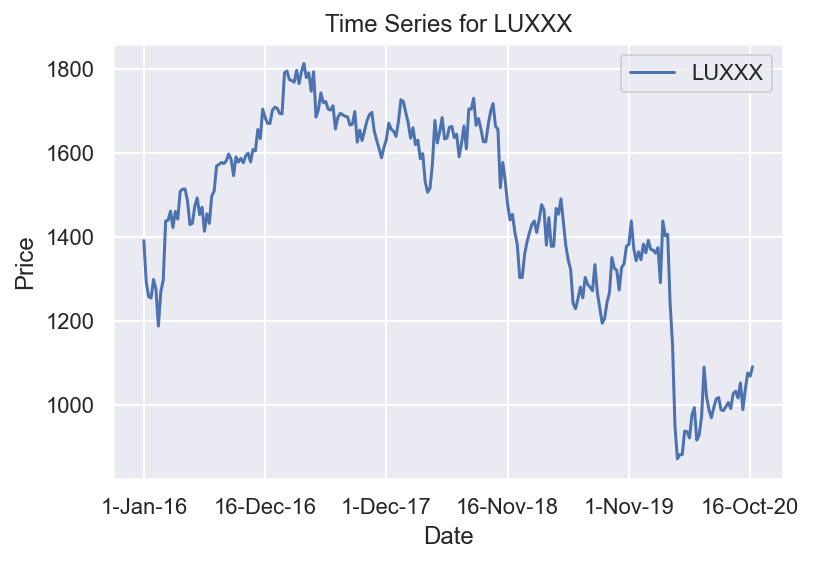

In [163]:
def graph_one_ts(col):
    plot_df = df[["Date", col]]
    plot_df.set_index("Date", inplace=True)
    plot_df.plot()
    plt.ylabel("Price")
    plt.title("Time Series for {}".format(col))
    
graph_one_ts("LUXXX")

## 4.2	Write a Python function that graphs 2 time series on the same plot, with labels

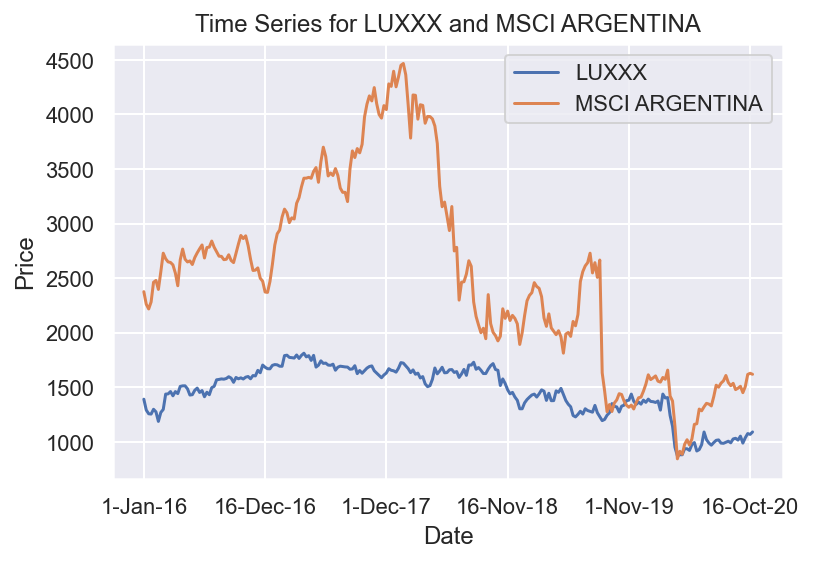

In [167]:
def graph_two_ts(col1, col2):
    plot_df = df[["Date", col1, col2]]
    plot_df.set_index("Date", inplace=True)
    plot_df.plot()
    plt.ylabel("Price")
    plt.title("Time Series for {} and {}".format(col1, col2))
    
graph_two_ts("LUXXX", "MSCI ARGENTINA")

## 4.3	Write a Python function that compares the 2 return series

In [172]:
def compare_two_returns(col1, col2):
    returns_df = df[[col1, col2]]
    ret1 = returns_df[col1].pct_change().mean()
    ret2 = returns_df[col2].pct_change().mean()
    
    return print("Mean return for {}: {} \n\n Mean return for {}: {} \n\n".format(col1, ret1, col2, ret2))
    
compare_two_returns("LUXXX", "MSCI ARGENTINA")

Mean return for LUXXX: -0.00040017905373322866 

 Mean return for MSCI ARGENTINA: 0.00026976122810635085 




# 5	2-Dimensional Data Summaries

In [146]:
data = df.copy()
data = data.drop(columns="Date")

## 5.1	Compute the correlation using Pearson correlation

In [142]:
data.corr(method="pearson")

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.754584,0.823881,0.046895,0.674894,0.850111,0.337350,0.133539,-0.192526,-0.676507,-0.045439,0.677351,0.380714,0.601071,0.119269,0.167161,0.557645,0.193620,-0.152044,0.397034,0.224822,0.174025,0.859403,-0.346658,-0.734921,0.168444,0.349905,-0.099556,0.556819,0.527276,0.797206,-0.147922,-0.483619,0.754859,-0.462818
MSCI ARGENTINA,0.754584,1.000000,0.740835,-0.160676,0.604493,0.747766,0.260126,-0.047239,-0.000917,-0.474811,0.110893,0.678930,0.350046,0.510696,0.010117,0.015244,0.508243,0.218971,-0.203116,0.371382,0.188907,0.310811,0.759354,-0.336182,-0.713526,0.026683,0.242801,-0.225743,0.501144,0.607563,0.661643,-0.209572,-0.459191,0.517648,-0.461817
BLP ORIENTE MEDIO,0.823881,0.740835,1.000000,-0.124534,0.387526,0.925401,0.144240,-0.114781,-0.449813,-0.616805,-0.312487,0.492296,0.222905,0.396939,-0.197143,-0.069617,0.359587,-0.111512,-0.424088,0.261513,-0.088410,-0.094217,0.823201,-0.485341,-0.727424,-0.184801,0.002905,-0.265565,0.318689,0.402231,0.646010,-0.340203,-0.549976,0.516283,-0.652986
MSCI AUSTRALIA,0.046895,-0.160676,-0.124534,1.000000,0.516601,-0.027924,0.755042,0.916125,0.536852,0.284185,0.599384,0.508376,0.765606,0.624283,0.718873,0.921855,0.596349,0.735227,0.825480,0.703030,0.675393,0.540544,0.017388,0.771409,0.445050,0.810983,0.714497,0.894720,0.648469,0.458925,0.445205,0.775572,0.755159,0.607045,0.715744
MSCI AUSTRIA,0.674894,0.604493,0.387526,0.516601,1.000000,0.495019,0.731040,0.562506,0.438279,-0.300536,0.550032,0.888062,0.813588,0.856685,0.591328,0.708573,0.801413,0.762312,0.454721,0.829645,0.764734,0.678859,0.605188,0.248228,-0.359425,0.752971,0.825097,0.437568,0.934414,0.725589,0.876846,0.355420,0.122654,0.876490,0.141123
MSCI BELGIUM,0.850111,0.747766,0.925401,-0.027924,0.495019,1.000000,0.209736,-0.036849,-0.369143,-0.616392,-0.230014,0.581903,0.304030,0.487311,-0.067410,0.049484,0.416299,0.037509,-0.304333,0.376750,0.000366,-0.030710,0.899776,-0.434554,-0.744533,-0.046238,0.139077,-0.201364,0.444066,0.547095,0.724709,-0.302931,-0.500430,0.627655,-0.602246
MSCI BRAZIL,0.337350,0.260126,0.144240,0.755042,0.731040,0.209736,1.000000,0.732142,0.465766,-0.083163,0.562476,0.811979,0.910710,0.937938,0.556716,0.762449,0.609400,0.808712,0.654698,0.701297,0.606018,0.551653,0.294600,0.463748,0.043793,0.768825,0.865784,0.786482,0.810813,0.622795,0.631839,0.511825,0.426602,0.749572,0.408112
MSCI CANADA,0.133539,-0.047239,-0.114781,0.916125,0.562506,-0.036849,0.732142,1.000000,0.676746,0.335889,0.741687,0.555424,0.744150,0.615089,0.783045,0.902872,0.731081,0.771960,0.845175,0.663895,0.770054,0.708383,0.008069,0.806199,0.453717,0.820085,0.729537,0.849771,0.624717,0.541088,0.428865,0.857026,0.724269,0.623534,0.759718
MSCI CHINA,-0.192526,-0.000917,-0.449813,0.536852,0.438279,-0.369143,0.465766,0.676746,1.000000,0.602393,0.980782,0.377255,0.518319,0.337513,0.731391,0.667324,0.561679,0.755195,0.810124,0.517451,0.786816,0.891796,-0.217102,0.814460,0.518594,0.683251,0.578218,0.590822,0.440631,0.417123,0.114691,0.785007,0.705410,0.202909,0.822201
MSCI DENMARK,-0.676507,-0.474811,-0.616805,0.284185,-0.300536,-0.616392,-0.083163,0.335889,0.602393,1.000000,0.537414,-0.275134,-0.002492,-0.292335,0.370449,0.272837,0.101663,0.111802,0.499613,0.060431,0.268285,0.400754,-0.552746,0.750802,0.862406,0.116178,-0.117812,0.328008,-0.235455,-0.063860,-0.425734,0.654080,0.766011,-0.401304,0.763004


## 5.2	Recompute the calculation, instead of using Spearman correlation

In [144]:
data.corr(method="spearman")

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.760165,0.763908,0.008914,0.630077,0.728380,0.171258,0.014335,-0.116688,-0.538869,0.005798,0.554788,0.264879,0.364556,0.090323,0.124665,0.573083,0.139133,-0.235222,0.321589,0.243513,0.233873,0.752881,-0.341706,-0.565547,0.135903,0.284113,-0.189760,0.421563,0.386641,0.696801,-0.108966,-0.443921,0.646838,-0.445698
MSCI ARGENTINA,0.760165,1.000000,0.762681,-0.170967,0.543215,0.815686,0.189584,-0.174087,-0.049772,-0.421900,0.060285,0.605042,0.275518,0.412710,-0.093829,-0.036529,0.458203,0.175782,-0.343454,0.305101,0.113044,0.254280,0.776578,-0.411066,-0.719957,-0.085017,0.211169,-0.274679,0.416496,0.515793,0.611122,-0.263058,-0.502658,0.486479,-0.564665
BLP ORIENTE MEDIO,0.763908,0.762681,1.000000,-0.225116,0.305152,0.881598,0.022868,-0.222396,-0.415513,-0.453115,-0.295090,0.359850,0.124695,0.192335,-0.296949,-0.127153,0.328552,-0.178697,-0.520241,0.188173,-0.118720,-0.080790,0.712599,-0.491070,-0.661538,-0.270019,-0.103185,-0.373495,0.187038,0.241724,0.503483,-0.316342,-0.548127,0.382994,-0.668146
MSCI AUSTRALIA,0.008914,-0.170967,-0.225116,1.000000,0.522231,-0.222302,0.702757,0.936633,0.545906,0.408691,0.595389,0.543726,0.751379,0.606095,0.703204,0.918585,0.579334,0.764185,0.831537,0.703167,0.672674,0.540290,-0.085123,0.759239,0.486747,0.830269,0.706822,0.838601,0.689851,0.494837,0.493137,0.749297,0.714589,0.621821,0.727221
MSCI AUSTRIA,0.630077,0.543215,0.305152,0.522231,1.000000,0.368606,0.674107,0.472486,0.446277,-0.078353,0.554642,0.882219,0.790899,0.810203,0.526612,0.695327,0.797265,0.757600,0.351085,0.823141,0.760857,0.683685,0.570112,0.208147,-0.265385,0.712182,0.797891,0.403134,0.902973,0.726394,0.878057,0.324909,0.128467,0.846133,0.121610
MSCI BELGIUM,0.728380,0.815686,0.881598,-0.222302,0.368606,1.000000,0.014034,-0.221215,-0.307498,-0.368589,-0.190399,0.406781,0.124331,0.219109,-0.222442,-0.090045,0.351937,-0.077921,-0.461633,0.227466,-0.062708,0.001082,0.825553,-0.463197,-0.666000,-0.235713,-0.050673,-0.410777,0.238371,0.415367,0.527247,-0.300457,-0.530308,0.417859,-0.660276
MSCI BRAZIL,0.171258,0.189584,0.022868,0.702757,0.674107,0.014034,1.000000,0.615794,0.413264,0.104694,0.484752,0.780311,0.912577,0.946705,0.452480,0.724075,0.528819,0.784765,0.574307,0.729318,0.551163,0.473854,0.143528,0.416505,0.102561,0.689064,0.809696,0.769487,0.792500,0.567375,0.602130,0.425370,0.425297,0.595758,0.389331
MSCI CANADA,0.014335,-0.174087,-0.222396,0.936633,0.472486,-0.221215,0.615794,1.000000,0.635031,0.471316,0.675563,0.506866,0.691672,0.524926,0.718225,0.898737,0.633048,0.728359,0.850564,0.669726,0.723428,0.604681,-0.122878,0.816690,0.519158,0.813339,0.649712,0.809950,0.625193,0.486469,0.444318,0.817390,0.739852,0.604094,0.766393
MSCI CHINA,-0.116688,-0.049772,-0.415513,0.545906,0.446277,-0.307498,0.413264,0.635031,1.000000,0.608738,0.976460,0.444056,0.518441,0.412224,0.686739,0.618130,0.579344,0.720008,0.723093,0.539614,0.782682,0.882349,-0.106270,0.778314,0.436034,0.629511,0.535999,0.589147,0.485453,0.469770,0.282470,0.723844,0.689994,0.323534,0.751277
MSCI DENMARK,-0.538869,-0.421900,-0.453115,0.408691,-0.078353,-0.368589,0.104694,0.471316,0.608738,1.000000,0.564055,-0.017833,0.220099,0.028048,0.380487,0.428612,0.195366,0.286369,0.564102,0.281249,0.358074,0.428970,-0.309892,0.793448,0.660324,0.259644,0.009157,0.416429,0.080001,0.151474,-0.061556,0.676213,0.826300,-0.029171,0.733555


## 5.3	Recompute the calculation, instead of using Kendall correlation

In [145]:
data.corr(method="kendall")

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.558401,0.580535,0.026813,0.457345,0.533548,0.110099,0.052488,-0.058876,-0.365459,0.018529,0.385000,0.175994,0.264023,0.071270,0.098906,0.381774,0.103522,-0.149560,0.205084,0.162777,0.161829,0.576741,-0.194460,-0.385379,0.116739,0.192943,-0.093657,0.283880,0.277683,0.513375,-0.039841,-0.257004,0.461898,-0.277493
MSCI ARGENTINA,0.558401,1.000000,0.547587,-0.091444,0.381774,0.600645,0.158351,-0.084424,-0.022134,-0.242965,0.054386,0.442611,0.208626,0.305571,-0.040726,-0.003858,0.304496,0.145450,-0.163663,0.217606,0.072725,0.169101,0.568456,-0.221527,-0.506798,-0.013849,0.188705,-0.153292,0.289888,0.368558,0.408335,-0.144628,-0.281857,0.335863,-0.313350
BLP ORIENTE MEDIO,0.580535,0.547587,1.000000,-0.117372,0.233858,0.704484,0.030228,-0.115791,-0.250047,-0.306077,-0.165370,0.257320,0.108265,0.134952,-0.184721,-0.055018,0.217416,-0.076140,-0.331626,0.140201,-0.044267,-0.031620,0.549864,-0.314488,-0.436476,-0.116803,-0.046923,-0.190603,0.158730,0.173402,0.353949,-0.205590,-0.350471,0.263770,-0.425409
MSCI AUSTRALIA,0.026813,-0.091444,-0.117372,1.000000,0.340669,-0.131601,0.522165,0.784924,0.369000,0.297161,0.408335,0.366344,0.568014,0.424904,0.514640,0.750395,0.416366,0.557200,0.648011,0.505723,0.481250,0.378107,-0.055524,0.611965,0.381585,0.625055,0.497186,0.665718,0.483020,0.331689,0.303042,0.575476,0.566622,0.433441,0.599254
MSCI AUSTRIA,0.457345,0.381774,0.233858,0.340669,1.000000,0.273319,0.485170,0.324733,0.400177,-0.047303,0.476633,0.713211,0.603681,0.624044,0.389426,0.485929,0.608297,0.544742,0.247391,0.629292,0.586479,0.589894,0.408714,0.186745,-0.192753,0.516980,0.592171,0.284070,0.744198,0.547904,0.703788,0.250870,0.113577,0.677228,0.117056
MSCI BELGIUM,0.533548,0.600645,0.704484,-0.131601,0.273319,1.000000,0.022323,-0.126352,-0.180801,-0.238348,-0.098274,0.294947,0.100487,0.151078,-0.117941,-0.032315,0.270221,-0.011320,-0.279074,0.180358,-0.019604,0.015494,0.629482,-0.293429,-0.443559,-0.104977,-0.023462,-0.244799,0.178650,0.303105,0.414596,-0.189844,-0.321824,0.320875,-0.430279
MSCI BRAZIL,0.110099,0.158351,0.030228,0.522165,0.485170,0.022323,1.000000,0.452413,0.319610,0.097704,0.361475,0.592108,0.740973,0.801429,0.325934,0.527161,0.376083,0.585910,0.430722,0.528363,0.379624,0.340543,0.103586,0.313097,0.088535,0.503889,0.641245,0.581737,0.588313,0.390628,0.405616,0.298236,0.326630,0.410042,0.321634
MSCI CANADA,0.052488,-0.084424,-0.115791,0.784924,0.324733,-0.126352,0.452413,1.000000,0.446025,0.324670,0.484412,0.352115,0.519509,0.372984,0.526845,0.732752,0.463290,0.530703,0.662746,0.482451,0.520395,0.442168,-0.067097,0.639347,0.370138,0.621451,0.466958,0.638462,0.440587,0.331879,0.295137,0.636375,0.559856,0.443875,0.594890
MSCI CHINA,-0.058876,-0.022134,-0.250047,0.369000,0.400177,-0.180801,0.319610,0.446025,1.000000,0.430532,0.883324,0.387656,0.409157,0.365269,0.498514,0.440713,0.421552,0.592930,0.557769,0.399165,0.580156,0.711250,-0.062164,0.595143,0.338835,0.452476,0.430532,0.424714,0.451464,0.351356,0.249225,0.540505,0.510719,0.281351,0.587934
MSCI DENMARK,-0.365459,-0.242965,-0.306077,0.297161,-0.047303,-0.238348,0.097704,0.324670,0.430532,1.000000,0.388857,0.009043,0.190034,0.038260,0.250300,0.318472,0.131917,0.175741,0.401252,0.221780,0.230317,0.283311,-0.187694,0.608487,0.503257,0.164675,0.009043,0.282869,0.075381,0.124012,-0.035920,0.492127,0.632644,-0.011257,0.554733


# 6	Data Selection
## 6.1	Choose one of the 35 variables to serve as your response variable (e.g. LUXXX)

In [40]:
y_col = "LUXXX"
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

# 7	Principal Component Analysis
## 7.1	Use the Pearson correlation matrix

In [173]:
corr_mat = data.corr(method="pearson")

# Strip the diagonal for future examination (replace diagonal 1 correlation with itself with all zeroes)
# for every single numeric value of our matrix
for x in range(corr_mat.shape[0]):
    # get diagonal value and set it to zero
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,0.000000,0.754584,0.823881,0.046895,0.674894,0.850111,0.337350,0.133539,-0.192526,-0.676507,-0.045439,0.677351,0.380714,0.601071,0.119269,0.167161,0.557645,0.193620,-0.152044,0.397034,0.224822,0.174025,0.859403,-0.346658,-0.734921,0.168444,0.349905,-0.099556,0.556819,0.527276,0.797206,-0.147922,-0.483619,0.754859,-0.462818
MSCI ARGENTINA,0.754584,0.000000,0.740835,-0.160676,0.604493,0.747766,0.260126,-0.047239,-0.000917,-0.474811,0.110893,0.678930,0.350046,0.510696,0.010117,0.015244,0.508243,0.218971,-0.203116,0.371382,0.188907,0.310811,0.759354,-0.336182,-0.713526,0.026683,0.242801,-0.225743,0.501144,0.607563,0.661643,-0.209572,-0.459191,0.517648,-0.461817
BLP ORIENTE MEDIO,0.823881,0.740835,0.000000,-0.124534,0.387526,0.925401,0.144240,-0.114781,-0.449813,-0.616805,-0.312487,0.492296,0.222905,0.396939,-0.197143,-0.069617,0.359587,-0.111512,-0.424088,0.261513,-0.088410,-0.094217,0.823201,-0.485341,-0.727424,-0.184801,0.002905,-0.265565,0.318689,0.402231,0.646010,-0.340203,-0.549976,0.516283,-0.652986
MSCI AUSTRALIA,0.046895,-0.160676,-0.124534,0.000000,0.516601,-0.027924,0.755042,0.916125,0.536852,0.284185,0.599384,0.508376,0.765606,0.624283,0.718873,0.921855,0.596349,0.735227,0.825480,0.703030,0.675393,0.540544,0.017388,0.771409,0.445050,0.810983,0.714497,0.894720,0.648469,0.458925,0.445205,0.775572,0.755159,0.607045,0.715744
MSCI AUSTRIA,0.674894,0.604493,0.387526,0.516601,0.000000,0.495019,0.731040,0.562506,0.438279,-0.300536,0.550032,0.888062,0.813588,0.856685,0.591328,0.708573,0.801413,0.762312,0.454721,0.829645,0.764734,0.678859,0.605188,0.248228,-0.359425,0.752971,0.825097,0.437568,0.934414,0.725589,0.876846,0.355420,0.122654,0.876490,0.141123
MSCI BELGIUM,0.850111,0.747766,0.925401,-0.027924,0.495019,0.000000,0.209736,-0.036849,-0.369143,-0.616392,-0.230014,0.581903,0.304030,0.487311,-0.067410,0.049484,0.416299,0.037509,-0.304333,0.376750,0.000366,-0.030710,0.899776,-0.434554,-0.744533,-0.046238,0.139077,-0.201364,0.444066,0.547095,0.724709,-0.302931,-0.500430,0.627655,-0.602246
MSCI BRAZIL,0.337350,0.260126,0.144240,0.755042,0.731040,0.209736,0.000000,0.732142,0.465766,-0.083163,0.562476,0.811979,0.910710,0.937938,0.556716,0.762449,0.609400,0.808712,0.654698,0.701297,0.606018,0.551653,0.294600,0.463748,0.043793,0.768825,0.865784,0.786482,0.810813,0.622795,0.631839,0.511825,0.426602,0.749572,0.408112
MSCI CANADA,0.133539,-0.047239,-0.114781,0.916125,0.562506,-0.036849,0.732142,0.000000,0.676746,0.335889,0.741687,0.555424,0.744150,0.615089,0.783045,0.902872,0.731081,0.771960,0.845175,0.663895,0.770054,0.708383,0.008069,0.806199,0.453717,0.820085,0.729537,0.849771,0.624717,0.541088,0.428865,0.857026,0.724269,0.623534,0.759718
MSCI CHINA,-0.192526,-0.000917,-0.449813,0.536852,0.438279,-0.369143,0.465766,0.676746,0.000000,0.602393,0.980782,0.377255,0.518319,0.337513,0.731391,0.667324,0.561679,0.755195,0.810124,0.517451,0.786816,0.891796,-0.217102,0.814460,0.518594,0.683251,0.578218,0.590822,0.440631,0.417123,0.114691,0.785007,0.705410,0.202909,0.822201
MSCI DENMARK,-0.676507,-0.474811,-0.616805,0.284185,-0.300536,-0.616392,-0.083163,0.335889,0.602393,0.000000,0.537414,-0.275134,-0.002492,-0.292335,0.370449,0.272837,0.101663,0.111802,0.499613,0.060431,0.268285,0.400754,-0.552746,0.750802,0.862406,0.116178,-0.117812,0.328008,-0.235455,-0.063860,-0.425734,0.654080,0.766011,-0.401304,0.763004


## 7.2	Show the amount of variation explained by the first 5 components

In [174]:
from sklearn.decomposition import PCA

pca_list = list()
# used to store our explained variable and feature importances
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 
                               'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             # divide by the sum to ensure each feature is a proportion of total
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.513291
2,PCA(n_components=2),0.84684
3,PCA(n_components=3),0.925535
4,PCA(n_components=4),0.962822
5,PCA(n_components=5),0.980509


## 7.3	How many components are needed to express 80% of the variation of the data?

Only 2

## 7.4	What is your interpretation of the 1st component?

It explains around 50% of the variance.

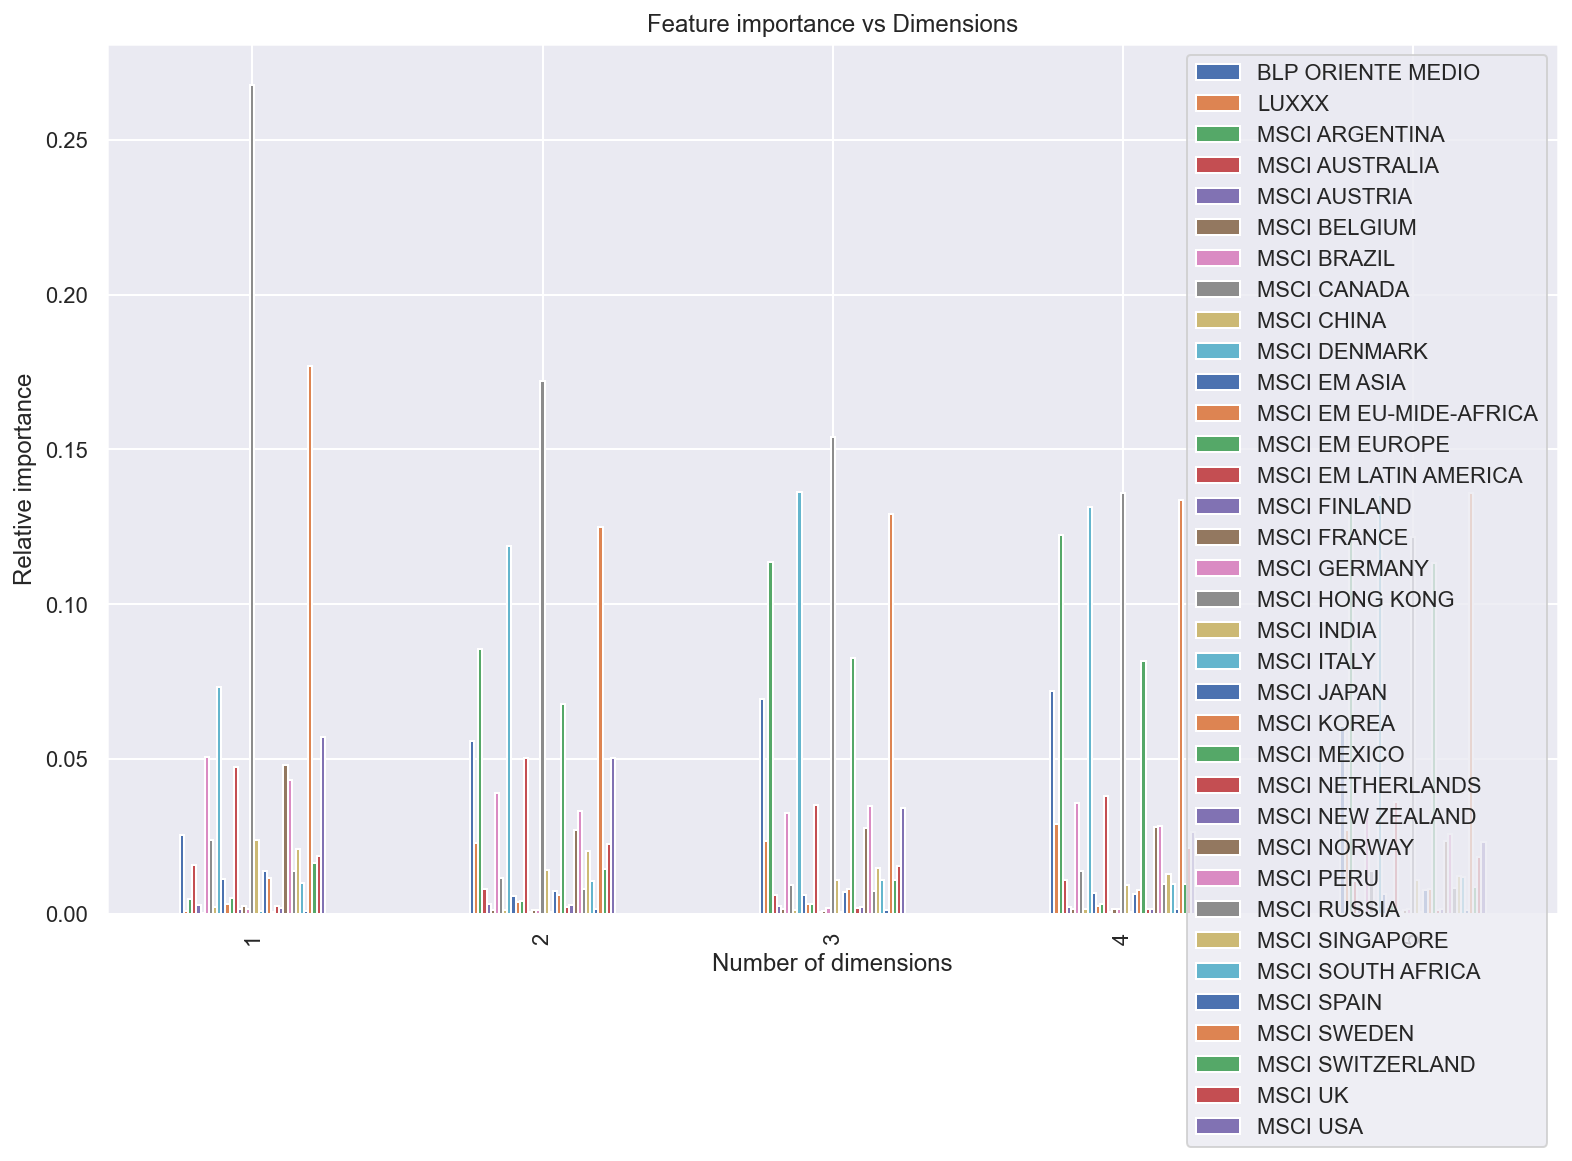

In [175]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

# 8	We will use PCA and the lasso regression
## 8.1	What do these 2 methodologies have in common?

These two methodologies both perform feature selection for us instead of having to do it manually ourselves. This means they find the optimal number of features, given constraints, to include in our model. PCA does it through dimensionality reduction, i.e. reducing the number of principal components (features), LASSO achieves this due to the selection effects it has for a fixed $\lambda$ (penalization coefficient) which makes it more likely to result in coefficients of features being set to zero.

## 8.2	How do these 2 methodologies differ?

PCA is a used in Unsupervised Learning as a dimensionality reduction technique, LASSO or Least Absolute Shrinkage and Selector Operator, is a for or regularization technique using in Supervised Learning that introduces an L1 penalization to the cost function.

$$ J(\alpha, \beta_1) = \frac{1}{2n}\sum_{i=1}^{n} \Big((\alpha + \beta_1 x_{\text{obs}}^i \Big)- y_{\text{obs}}^i \Big)^2  + \lambda \sum_{j-1}^{k} |{\beta_j}| $$

# 9	PCA Regression and Lasso Regression
## 9.1	Run a regression of Y versus the PCA scores

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = data.drop('LUXXX', axis=1)

y = data.LUXXX

X_train = train[feature_cols]
y_train = train['LUXXX']

X_test  = test[feature_cols]
y_test  = test['LUXXX']

pipe = [
    ('pca', PCA(n_components=n)),
    ('regression', lr)
]
pipe = Pipeline(pipe)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

PCA_r2 = r2_score(y_pred, y_test)
PCA_r2

0.8233619511815267

# 10	Lasso Regression
## 10.1	Run a linear regression of Y versus the other predictors

In [177]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

feature_cols = [x for x in train.columns if x != 'LUXXX']
X_train = train[feature_cols]
y_train = train['LUXXX']

X_test  = test[feature_cols]
y_test  = test['LUXXX']

In [178]:
# root-mean-squared error function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [179]:
## Linear Regression
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

44.100587518939015


In [180]:
y_pred = linearRegression.predict(X_test)
lin_regression_r2 = r2_score(y_pred, y_test)
lin_regression_r2

0.9601307659097984

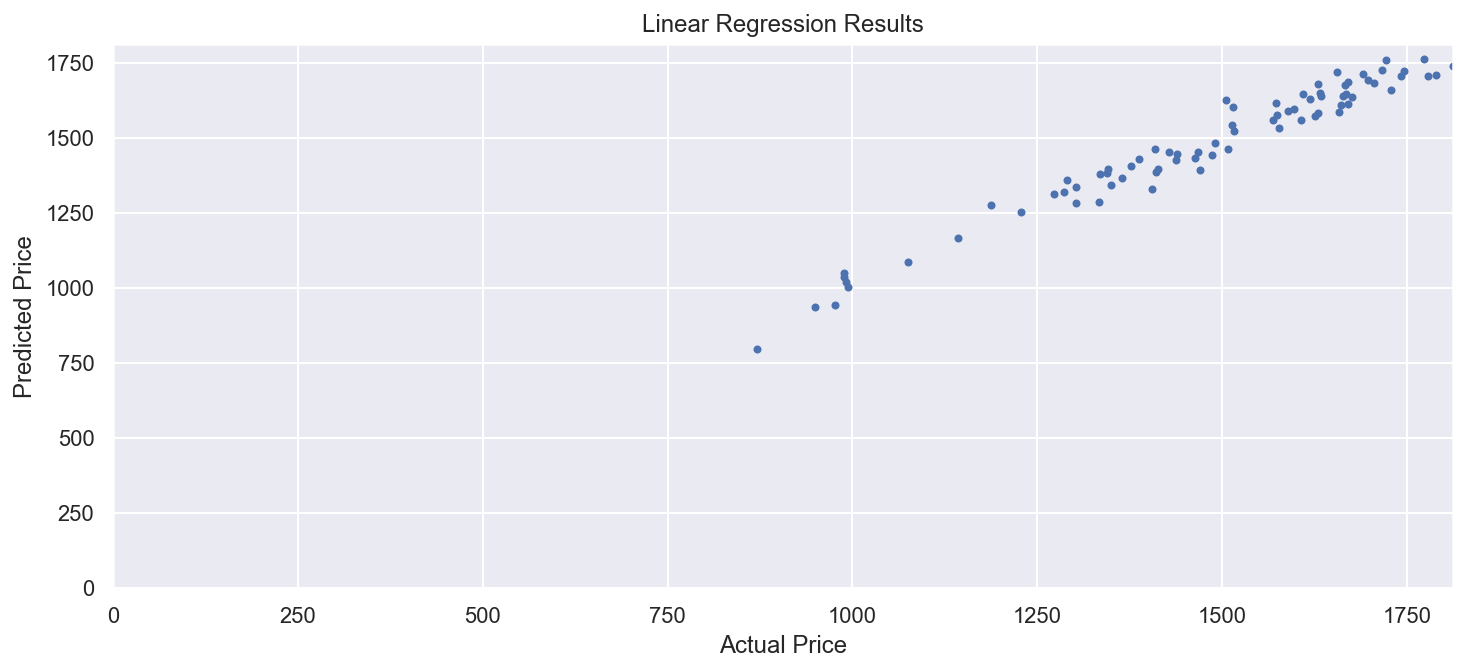

In [181]:
plt.figure(figsize=(12,5))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');
plt.show()

## 10.2	For the lasso, use at least 1000 different values of the penalty parameter

$$\text{&}$$

## 10.3	Split the data into testing and training, with 2/3 for training and 1/3 for testing

In [182]:
from sklearn.linear_model import LassoCV
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

alphas = np.linspace(1e-5, 10, num=1000)

lassoCV = LassoCV(alphas=alphas,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print("The best penalty parameter is: {} with Root Mean Square Error: {}".format(
                                        lassoCV.alpha_, lassoCV_rmse))

The best penalty parameter is: 1.06107 with Root Mean Square Error: 43.28718995881839


In [183]:
print('Out of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Out of 34 coefficients, 34 are non-zero with Lasso.


In [184]:
LASSO_1_r2 = r2_score(y_test, lassoCV.predict(X_test))
LASSO_1_r2

0.9644253380550712

## 10.4	Find a lasso model that includes no more than 7 predictors

In [185]:
alphas = np.linspace(10000, 100000, num=1000)

lassoCV = LassoCV(alphas=alphas,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print("The best penalty parameter is: {} with Root Mean Square Error: {}".format(
                                        lassoCV.alpha_, lassoCV_rmse))

The best penalty parameter is: 10000.0 with Root Mean Square Error: 89.59971392364601


In [186]:
print('Out of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Out of 34 coefficients, 5 are non-zero with Lasso.


In [187]:
LASSO_2_r2 = r2_score(y_test, lassoCV.predict(X_test))
LASSO_2_r2

0.8475823575003614

# 11 Which model - PCA regression or lasso -- provides a better fit to the data?  Why?

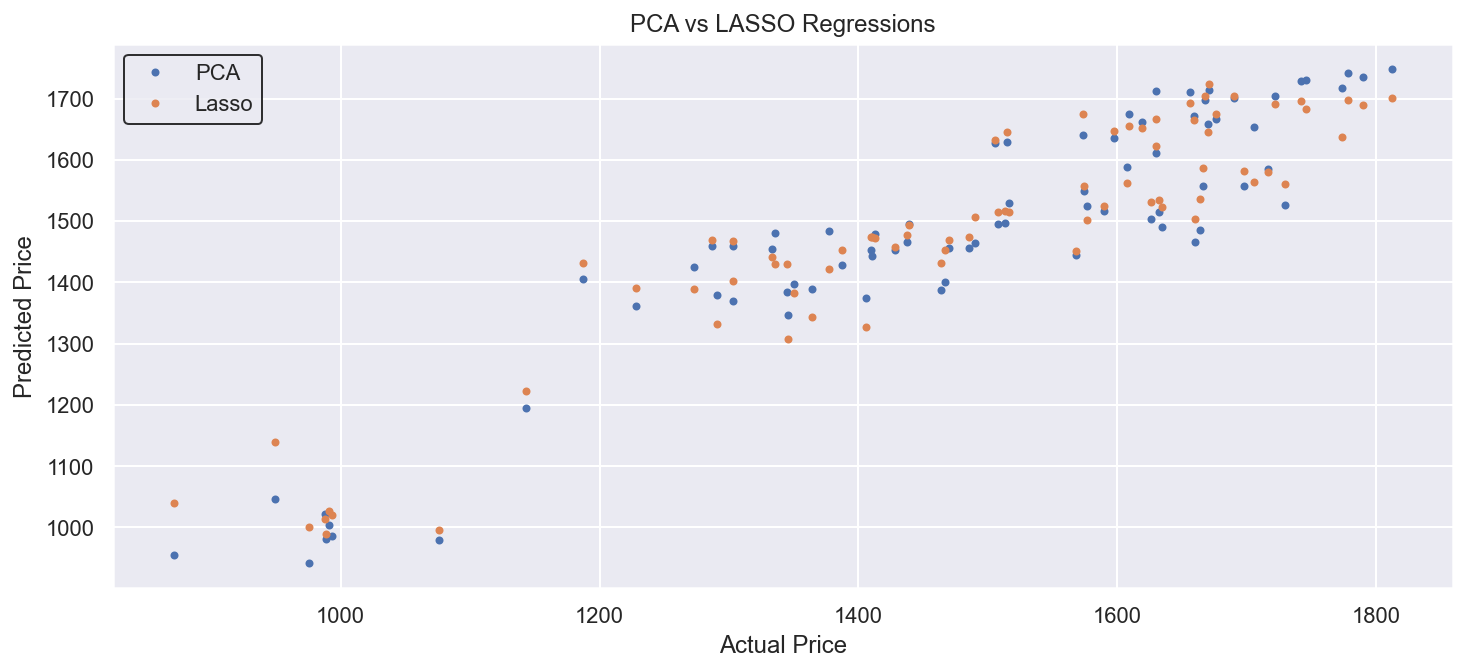

In [188]:
f = plt.figure(figsize=(12,5))
ax = plt.axes()

pipe = [
    ('pca', PCA(n_components=n)),
    ('regression', lr)
]
pipe = Pipeline(pipe)

labels = ['PCA', 'Lasso']

models = [pipe.fit(X_train, y_train), lassoCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='PCA vs LASSO Regressions');

In [189]:
pd.DataFrame({"Linear Regression":lin_regression_r2,
          "PCA Regression":PCA_r2,
          "LASSO Regression":LASSO_1_r2},
            index=["R Squared"])

,Linear Regression,PCA Regression,LASSO Regression
R Squared,0.960131,0.823362,0.964425
